In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pandas
`Pandas` (`pandas o pd` en esta guía ) es una de las librerías más importantes en el ecosistema `python` y, también, está construida sobre `numpy`.

Permite manejar datos a modo de tabla de bases de datos (`Dataframe`) con una interfaz muy fácil de utilizar.

Pero antes de trabajar con `dataframes` conviene analizar la otra estructura de datos presente en `pd`:



## Series

Una `serie` puede entenderse como un array unidimensional en el que, además, los datos están indexados:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
data[1:2]

1    0.5
dtype: float64

In [ ]:

data.index = ['1q','2q','3q','4q']
data

1q    0.25
2q    0.50
3q    0.75
4q    1.00
dtype: float64

In [ ]:
data['2q':'4q']

2q    0.50
3q    0.75
4q    1.00
dtype: float64

In [ ]:
!ls -al

total 28
drwxr-xr-x 1 root root 4096 Feb 13 11:09 .
drwxr-xr-x 1 root root 4096 Feb 13 10:47 ..
drwxr-xr-x 4 root root 4096 Feb  9 14:20 .config
drwx------ 5 root root 4096 Feb 13 10:49 drive
-rw-r--r-- 1 root root   56 Feb 13 11:09 json.json
-rw-r--r-- 1 root root   27 Feb 13 11:09 local.csv
drwxr-xr-x 1 root root 4096 Feb  9 14:20 sample_data



## Dataframe

Es la estructura de datos principal de `pandas`. Representa una tabla en donde los datos son de diferentes tipos y están etiquetados. Facilita hacer operaciones que, en Numpy, no eran fáciles de realizar como agrupaciones, joinings, gestión de valores nulos, etc.

Como se acaba de exponer, un `dataframe` puede entenderse como una tabla de base de datos pero, también, como una nueva forma de gestionar diccionarios o una generalización de matrices en `Numpy`


# Nueva sección

### Creación de un dataframe:

Para crear un dataframe, hay que hacer la llamada a pd.DataFrame().

De forma implícita o explícita, cuando creemos un dataframe le tenemos que proporcionar los siguientes datos:

**data**: datos del DataFrame.

**index**: índice de cada fila del DataFrame. Si no se especifica, se pone uno por defecto.

**columns**: nombre de las columnas del DataFrame. Si no viene especificado, se establece un nombre de columnas por defecto.

Existen varios métodos para generar dataframes, aquí veremos los más comunes:


#### A partir de un diccionario (lista de diccionarios)

Pandas deducirá que las claves son el nombre de las columnas de los dataframes:

In [ ]:
df = pd.DataFrame([{'edad':25, 'nombre':'juan'},{'edad':32,'nombre':'Ana'}])
df.head()

,edad,nombre
0,25,juan
1,32,Ana


In [ ]:
df = pd.DataFrame([{'edad':25, 'nombre':'juan','carrera':'BA'},{'edad':32,'nombre':'Ana'}])
df.head()

,edad,nombre,carrera
0,25,juan,BA
1,32,Ana,NaN


In [ ]:
df = pd.DataFrame([{'edad':25, 'nombre':'juan', 'carrera':'business analytics'},{'edad':32,'nombre':'Ana'}])
df.head()

,edad,nombre,carrera
0,25,juan,business analytics
1,32,Ana,NaN


#### Un caso especial de diccionario: a partir de listas de valores

In [ ]:
df = pd.DataFrame({'year':[1999,2000],'model':['A','B']})
df.head()

,year,model
0,1999,A
1,2000,B


#### A partir de matriz de datos

En este caso, hay que incluir el nombre de las columnas:

In [ ]:
import numpy as np
df = pd.DataFrame(np.random.rand(3,3),columns=['CUno','CDos','CTres'])
df.head()

,CUno,CDos,CTres
0,0.835450,0.685490,0.255201
1,0.496307,0.600225,0.048845
2,0.648520,0.981707,0.471459


### Lectura de datos a partir de archivos

Existen muchos tipos de ficheros que son utilizados comunmente en el ámbito del análisis de datos: TXT, CSV, JSON, parquet, etc.

Pandas permite leer estos ficheros e importarlos a un `DataFrame` por medio de diferentes funciones.

Lo más común será la importación de datos a partir de:


**1. archivo txt**

`pd.read_table` es la función que permite leer todo tipo de fichero de texto plano, especificando columnas (`names`) o separadores (`sep`), entre otros parámetros.  

In [ ]:
df = pd.read_table('/content/drive/MyDrive/datasets/students.txt',sep = ',',names=['nombre','ex1','ex2','ex3','ex4'])
df.head()

,nombre,ex1,ex2,ex3,ex4
0,Emily,44,55,78,NaN
1,Andy,47,34,89,NaN
2,Rick,55,78,55,NaN
3,Aaron,66,34,98,NaN




**2. archivo csv**
pd.read_csv es, en la práctica, como `pd.read_table`, pero orientado a leer archivos separados por comas, aunque en la práctica puedes definir cualquier separador. Tiene parámetros similares a `pd.read_table` y, en la práctica, ambos son intercambiables para este tipo de ficheros.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/YouTube.csv',sep = ',')
df.head()

,Channel,Subs (in millions),Views (in millions)
0,T-Series,123.0,94410
1,Canal KondZilla,54.5,27860
2,Zee Music Company,48.5,22689
3,Ed Sheeran,43.2,18905
4,EminemMusic,40.2,773


**2. archivo json**

**2.1 documentos guardados como una lista de diccionarios**

Este caso será el más habitual si se trabaja con apis REST o Mongodb. Se deberá especificar el parámetro `orient` con el valor `records`
`
[{"nombre":"juan","edad":24},
{"nombre":"mariaj","edad":56},
{"nombre":"pedro","edad":13},
{"nombre":"marta","edad":42}]
`

In [ ]:
df = pd.read_json('/content/drive/MyDrive/datasets/estudiantes.json',orient='records')
df.head()

,nombre,edad
0,juan,24
1,mariaj,56
2,pedro,13
3,marta,42


**2.2 documentos guardados en formato json con estructura índice valor:**


`{
  "nombre_col":{"indice1":valor1,...,"indicen":valorn},
  ...
  "nombre_coln":{"indice1":valor1,...,"indicen":valorn}
}`

In [ ]:
df = pd.read_json('/content/drive/MyDrive/datasets/estudiantes_2.json')
df.head()

,nombre,edad
1,juan,24
2,mariaj,56
3,pedro,13
4,marta,42


**3. Lectura de múltiples archivos**

Utilizando el módulo `glob` podemos importar varios archivos que sigan un patrón determinado en el nombre de su ruta:

In [ ]:
[i for i in range (0,10,2)]

[0, 2, 4, 6, 8]

In [ ]:
import glob # módulo que detecta nombres de ruta que siguen un patrón determinado
import os

ruta = "/content/drive/MyDrive/datasets/"

listado_de_archivos = glob.glob(os.path.join(ruta,'ventas*.csv'))

## Más adelante se ve con más detalle, pero pd.concat permite concatenar (apilar) dataframes

df = pd.concat([pd.read_csv(archivo) for archivo in listado_de_archivos])
df

,year,model,sales
0,1999,A,25010
1,1999,B,12100
2,1999,C,9070
3,1999,D,6500
0,2000,A,5010
1,2000,B,3100
2,2000,C,19070
3,2000,D,4300
4,2000,E,7800


**NOTA** Fijaos que el índice de ambos conjuntos es el mismo. Esto, puede dar lugar a errores en operaciones de filtrado dirigidas por el índice en un dataframe. Es importante asegurarse de que el índice tiene su propia secuencia o numeración. Por ejemplo:

In [ ]:
df.index

Int64Index([0, 1, 2, 3, 0, 1, 2, 3, 4], dtype='int64')

**Cambio de índices**:

In [ ]:
df.index = [index for index in range(0, len(df))]
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
df

,year,model,sales
0,1999,A,25010
1,1999,B,12100
2,1999,C,9070
3,1999,D,6500
4,2000,A,5010
5,2000,B,3100
6,2000,C,19070
7,2000,D,4300
8,2000,E,7800


### Escritura de archivos en pandas


Del mismo modo que `pandas` permite la lectura de diferentes tipos de archivo, también permite la lectura a estos archivos.

In [ ]:
df = pd.DataFrame([{'edad':25, 'nombre':'juan'},{'edad':32,'nombre':'Ana'}])
df.to_csv('local.csv',index=False)
df.to_json('json.json',orient='records')

In [ ]:
!cat local.csv

edad,nombre
25,juan
32,Ana


### Cambio de nombre de columnas


In [ ]:
df.columns=['año','modelo']
df

,año,modelo
0,25,juan
1,32,Ana


### Indices

Un `DataFrame` es, también, una estructura de datos indexada. Esto va a facilitar las operaciones de acceso, agragación y unión a los datos. Asimismo, desde un punto de vista conceptual, un índice aporta semántica al dar nombre a un registro (fila) de la tabla. De este modo, se puede entender un dataframe no ya como una tabla, sino como una estructura bidimensional en el que las filas son instancias de un modelo conceptual de datos definido por las columnas.

El índice puede entenderse de dos modos:

**1. Como un array inmutable**



In [ ]:
ind = df.index
print(ind.size, ind.shape, ind.ndim, ind.dtype)

2 (2,) 1 int64


In [ ]:
df.iloc[0,:]

año         25
modelo    juan
Name: 0, dtype: object

**2. Como un conjunto**



In [ ]:
df1 = df.iloc[0:4,:]
df2 = df.iloc[4:,:]
index1 = df1.index
index2 = df2.index


In [ ]:
index1

RangeIndex(start=0, stop=2, step=1)

In [ ]:
index2

RangeIndex(start=2, stop=2, step=1)

In [ ]:
## union
index1.union(index2)

RangeIndex(start=0, stop=2, step=1)

In [ ]:
index2.intersection(index1)

RangeIndex(start=2, stop=2, step=1)

## Información de un dataframe


###  Atributos y métodos importantes en DataFrames




|Nombre Función/Atributo|Funcionalidad|
|---|---|
|df.index|Devuelve el rango de valores de los índices del DataFrame|
|df.columns|Devuelve el nombre de las columnas del DataFrame|
|df.values|Devuelve un numpy array con los valores del DataFrame|
|df.shape|Devuelve una tupla con las dimensiones del DataFrame (Nº Filas, Nº Columnas)|
|len(df)|Devuelve el número de filas que tiene el DataFrame|
|df.types|Devuelve el tipo de dato de cada una de las columnas|
|df.head(n)|Devuelve un DataFrame con los 'n' primeros elementos|
|df.tail(n)|Devuelve un DataFrame con los 'n' últimos elementos|
|df['nombre_columna'].unique()|Devuelve los valores únicos de la columna del DataFrame|
|df.info()|Devuelve una descripción de la composición del DataFrame: columnas, tipos de datos, etc|
|df.describe()|Devuelve una descripción descriptiva de los datos recogidos en el DataFrame|
|df.columna.describe()|Devuelve una descripción de los valores de la columna del DataFrame|


In [ ]:
import pandas as pd
irisdataset = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')
irisdataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
irisdataset.index

RangeIndex(start=0, stop=150, step=1)

In [ ]:
irisdataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
irisdataset.values

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [ ]:
type(irisdataset.values)

numpy.ndarray

In [ ]:
irisdataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
irisdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Selección y acceso a los datos

Existen tres formas *básicas* de acceder a los datos en un dataframe de pandas:



#### Por la posición de las filas (slicing):


In [ ]:
df = irisdataset

In [ ]:
import copy
df = copy.copy(irisdataset)
#df = irisdataset

In [ ]:
df[1:10]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Por posición de filas
**Df.iloc**: especifica el número de fija y columna a mostrar

In [ ]:
## df.iloc

df.iloc[0:6,1:3] #filas y columnas

,sepal_width,petal_length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
5,3.9,1.7


#### Por valores sobre columnas o valores de índices

**df.loc** Permite acceder por nombre de índices o columnas y por condiciones sobre éstas:

In [ ]:
df.loc[((df.sepal_width>100) | (df.sepal_width<200)),:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.loc[((df.sepal_width>4) & (df.sepal_width<5)),:]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [ ]:
df.loc[((df.sepal_width>100) | (df.sepal_width<200)),['species']]

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


**Vamos a realizar algunas operaciones con otro dataset: ventas**

In [ ]:
import glob # módulo que detecta nombres de ruta que siguen un patrón determinado
import os

ruta = "/content/drive/MyDrive/datasets/"

listado_de_archivos = glob.glob(os.path.join(ruta,'ventas*.csv'))

## Más adelante se ve con más detalle, pero pd.concat permite concatenar (apilar) dataframes

ventas = pd.concat([pd.read_csv(archivo) for archivo in listado_de_archivos])
ventas

,year,model,sales
0,1999,A,25010
1,1999,B,12100
2,1999,C,9070
3,1999,D,6500
0,2000,A,5010
1,2000,B,3100
2,2000,C,19070
3,2000,D,4300
4,2000,E,7800


In [ ]:
ventas.loc[ventas.model=='C',['year','sales']]

,year,sales
2,1999,9070
2,2000,19070


In [ ]:
## Vamos a cambiar el nombre de los índices
ventas.index = ['España','Canada','Francia','Alemania','Italia','España','Canada','Alemania','Italia']
ventas

,year,model,sales
España,1999,A,25010
Canada,1999,B,12100
Francia,1999,C,9070
Alemania,1999,D,6500
Italia,2000,A,5010
España,2000,B,3100
Canada,2000,C,19070
Alemania,2000,D,4300
Italia,2000,E,7800


In [ ]:
ventas.loc['España']

,year,model,sales
España,1999,A,25010
España,2000,B,3100


In [ ]:
ventas.loc[['España','Italia']]

,year,model,sales
España,1999,A,25010
España,2000,B,3100
Italia,2000,A,5010
Italia,2000,E,7800


También es posible evitar una columna en concreto

In [ ]:

ventas.loc[:, ventas.columns!='modelo']

,year,model,sales
España,1999,A,25010
Canada,1999,B,12100
Francia,1999,C,9070
Alemania,1999,D,6500
Italia,2000,A,5010
España,2000,B,3100
Canada,2000,C,19070
Alemania,2000,D,4300
Italia,2000,E,7800


## Algunas operaciones útiles que se pueden realizar sobre todo el dataframe


Un dataframe es una estructura columnar. Quiere decir esto, que las operaciones no se realizan fila a fila (es muy ineficiente), sino que se realizan sobre toda la columna.


No obstante, existen algunas funciones que se pueden realizar sobre todo el dataframe:

### Rellenar valores nulos sobre todo el dataframe

In [ ]:
ventas = ventas.fillna(0)
ventas.tail()

,year,model,sales
Italia,2000,A,5010
España,2000,B,3100
Canada,2000,C,19070
Alemania,2000,D,4300
Italia,2000,E,7800


In [ ]:
#['year'] = 1000

### Identificar valores duplicados
Devuelve un listado de filas, especificando mediante True o False aquellas cuyo contenido está duplicado.

In [ ]:
ventas.duplicated()

España      False
Canada      False
Francia     False
Alemania    False
Italia      False
España      False
Canada      False
Alemania    False
Italia      False
dtype: bool

In [ ]:
any(ventas.duplicated())

False

In [ ]:
ventas.duplicated(subset=['model'])

España      False
Canada      False
Francia     False
Alemania    False
Italia       True
España       True
Canada       True
Alemania     True
Italia      False
dtype: bool

### Estadísticos del dataframe

A parte del método `describe` ya visto, podemos obtener a nivel de dataframe valores como:




|Nombre Función/Atributo|Funcionalidad|
|---|---|
|df.sum|Devuelve la suma de los valores de las columnas un DataFrame|
|df.mean|Devuelve la media de los valores de las columnas de un DataFrame|
|df.max|Devuelve los valores máximos de las columnas de un DataFrame|
|df.min|Devuelve los valores mínimos de las columnas de un DataFrame|


In [ ]:
ventas.describe()

,year,sales
count,9.000000,9.000000
mean,1999.555556,10217.777778
std,0.527046,7369.728248
min,1999.000000,3100.000000
25%,1999.000000,5010.000000
50%,2000.000000,7800.000000
75%,2000.000000,12100.000000
max,2000.000000,25010.000000


In [ ]:
ventas.sum()

year         17996
model    ABCDABCDE
sales        91960
dtype: object

In [ ]:
ventas.mean()

<ipython-input-223-4d64ad541fc4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ventas.mean()


year      1999.555556
sales    10217.777778
dtype: float64

In [ ]:
ventas.max()

year      2000
model        E
sales    25010
dtype: object

In [ ]:
ventas.min()

year     1999
model       A
sales    3100
dtype: object

### Cambiar los valores de un DataFrame

`df.replace` sustituye en el DataFrame todas aquellas ocurrencias de un valor 'X' por otro valor 'Y'

In [ ]:
ventas.replace(1999.0, 1999.1)

,year,model,sales
España,1999.1,A,25010
Canada,1999.1,B,12100
Francia,1999.1,C,9070
Alemania,1999.1,D,6500
Italia,2000.0,A,5010
España,2000.0,B,3100
Canada,2000.0,C,19070
Alemania,2000.0,D,4300
Italia,2000.0,E,7800


## Operaciones a nivel de columna


### Estadísticos

Las mismas funciones que se han aplicado a nivel del DataFrame, se pueden realizar a nivel de columnas. Por ejemplo:

In [ ]:
type (ventas.sales)

pandas.core.series.Series

In [ ]:
ventas.sales.sum()

91960

No obstante, tenemos también la posibilidad de hacer sumas acumuladas

In [ ]:
ventas.sales.cumsum()

España      25010
Canada      37110
Francia     46180
Alemania    52680
Italia      57690
España      60790
Canada      79860
Alemania    84160
Italia      91960
Name: sales, dtype: int64



### Añadir una columna sobre los valores de otras columnas
Vamos a importar los valores de ventas, pero modificando los índices a nivel columna y, sobre eso, añadiremos una nueva columna utilizando los valores de otras dos columnas:

In [ ]:
import glob # módulo que detecta nombres de ruta que siguen un patrón determinado
import os

ruta = "/content/drive/MyDrive/datasets/"

listado_de_archivos = glob.glob(os.path.join(ruta,'ventas*.csv'))

try:
  ventas2 = pd.concat([pd.read_csv(archivo) for archivo in listado_de_archivos],axis='columns') ## EN este caso, el índice son las columnas, por eso no puedo verificar la integridad
  ventas2.columns = ['year_1999','model_1999','vts_1999','year_2000','model_2000','vts_2000',]
except ValueError as e:
  print("ValueError:", e)

In [ ]:
ventas2['total_vts']=ventas2['vts_1999']+ventas2['vts_2000']
ventas2

,year_1999,model_1999,vts_1999,year_2000,model_2000,vts_2000,total_vts
0,1999.0,A,25010.0,2000,A,5010,30020.0
1,1999.0,B,12100.0,2000,B,3100,15200.0
2,1999.0,C,9070.0,2000,C,19070,28140.0
3,1999.0,D,6500.0,2000,D,4300,10800.0
4,NaN,NaN,NaN,2000,E,7800,NaN


###  Borrado de las columnas de un dataframe

In [ ]:
ventas2.drop(columns=['year_1999'])

,model_1999,vts_1999,year_2000,model_2000,vts_2000,total_vts
0,A,25010.0,2000,A,5010,30020.0
1,B,12100.0,2000,B,3100,15200.0
2,C,9070.0,2000,C,19070,28140.0
3,D,6500.0,2000,D,4300,10800.0
4,NaN,NaN,2000,E,7800,NaN


In [ ]:
ventas2

,year_1999,model_1999,vts_1999,year_2000,model_2000,vts_2000,total_vts
0,1999.0,A,25010.0,2000,A,5010,30020.0
1,1999.0,B,12100.0,2000,B,3100,15200.0
2,1999.0,C,9070.0,2000,C,19070,28140.0
3,1999.0,D,6500.0,2000,D,4300,10800.0
4,NaN,NaN,NaN,2000,E,7800,NaN


In [ ]:
ventas2.loc[ventas2.model_1999.isna(),'model_1999']= 99

In [ ]:
ventas2

,year_1999,model_1999,vts_1999,year_2000,model_2000,vts_2000,total_vts
0,1999.0,A,25010.0,2000,A,5010,30020.0
1,1999.0,B,12100.0,2000,B,3100,15200.0
2,1999.0,C,9070.0,2000,C,19070,28140.0
3,1999.0,D,6500.0,2000,D,4300,10800.0
4,NaN,99,NaN,2000,E,7800,NaN


## Combinaciones

Una de las características de `pd` es que es muy eficiente a la hora de hacer operaciones de combinación. Nosotros usaremos el método `merge` para combinaciones que operen a nivel de fila (el equivalente a un join).

Veamos unos ejemplos:



In [ ]:
df1 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'carrera': ['ADE', 'BA', 'Informatica', 'Informatica']})
df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'graduacion': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

   alumno      carrera
0   Maria          ADE
1  Javier           BA
2   Ester  Informatica
3   Pedro  Informatica
   alumno  graduacion
0   Maria        2004
1  Javier        2008
2   Ester        2012
3   Pedro        2014


### Joins: merge

`merge` identifica las columnas y filas comunes de ambos dataframes, haciendo el equivalente a un **inner join** de ambos\:

In [ ]:
## Combinación 1 a 1

df1.merge(df2)

,alumno,carrera,graduacion
0,Maria,ADE,2004
1,Javier,BA,2008
2,Ester,Informatica,2012
3,Pedro,Informatica,2014


In [ ]:
df1 = pd.DataFrame({'alumno': ['Raul', 'Javier', 'Ester', 'Pedro'],
'carrera': ['ADE', 'BA', 'Informatica', 'Informatica']})
df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'graduacion': [2004, 2008, 2012, 2014]})


In [ ]:
df1

,alumno,carrera
0,Raul,ADE
1,Javier,BA
2,Ester,Informatica
3,Pedro,Informatica


In [ ]:
df2

,alumno,graduacion
0,Maria,2004
1,Javier,2008
2,Ester,2012
3,Pedro,2014


In [ ]:
df1.merge(df2)

,alumno,carrera,graduacion
0,Javier,BA,2008
1,Ester,Informatica,2012
2,Pedro,Informatica,2014


In [ ]:
df1 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'carrera': ['ADE', 'BA', 'Informatica', 'Informatica']})

df1

,alumno,carrera
0,Maria,ADE
1,Javier,BA
2,Ester,Informatica
3,Pedro,Informatica


In [ ]:


df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'graduacion': [2004, 2008, 2012, 2014]})

df3 = df1.merge(df2)

df3

,alumno,carrera,graduacion
0,Maria,ADE,2004
1,Javier,BA,2008
2,Ester,Informatica,2012
3,Pedro,Informatica,2014


In [ ]:

df4 = pd.DataFrame({'carrera': ['ADE', 'BA', 'Informatica'],
'Director': ['Ana', 'Carlos', 'Pedro']})
df4.merge(df3)
df4

,carrera,Director
0,ADE,Ana
1,BA,Carlos
2,Informatica,Pedro


#### Clave de combinación

Se puede especificar la columna sobre la que se va a realizar la combinación mediante el parámetro `on`

In [ ]:
df1.merge(df2,on='alumno')

,alumno,carrera,graduacion
0,Maria,ADE,2004
1,Javier,BA,2008
2,Ester,Informatica,2012
3,Pedro,Informatica,2014


En caso de que dos dataframes tengan nombre de columnas diferentes, se puede especificar las columnas por las que se hará la combinación mediante los parámetros `left_on` y `right_on`. Veámoslo:

In [ ]:

df3 = pd.DataFrame({'nombre': ['Laura', 'Maria', 'Javier', 'Pedro'],
'nota': [8, 8, 6, 9]})
df1.merge(df3, left_on='alumno', right_on='nombre')

,alumno,carrera,nombre,nota
0,Maria,ADE,Maria,8
1,Javier,BA,Javier,6
2,Pedro,Informatica,Pedro,9


#### Sufijos en los nombres de las columnas

Puede ser necesario cambiar el nombre de las columnas a la hora de combinar dos dataframes. Por ejemplo, si estamos importando notas de alumnos donde cada nota se almacena en un fichero diferente con la misma estructura, tendríamos que modificar el nombre de estas columnas:

In [ ]:
df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'nota': [8, 4, 10, 5]})
df9 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'nota': [7, 10, 6, 8]})


In [ ]:
df2

,alumno,nota
0,Maria,8
1,Javier,4
2,Ester,10
3,Pedro,5


In [ ]:
df9

,alumno,nota
0,Maria,7
1,Javier,10
2,Ester,6
3,Pedro,8


In [ ]:
df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'nota': [8, 4, 10, 5]})
df9 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'nota': [7, 10, 6, 8]})

df2.merge(df9, suffixes=['_PII','_ADE'], on ='alumno')

,alumno,nota_PII,nota_ADE
0,Maria,8,7
1,Javier,4,10
2,Ester,10,6
3,Pedro,5,8


#### Tipología de join

Veamos de nuevo el ejemplo en el que no tenemos los mismos alumnos en ambos dataframes:

In [ ]:
df1 = pd.DataFrame({'alumno': ['Raul', 'Javier', 'Ester', 'Pedro'],
'carrera': ['ADE', 'BA', 'Informatica', 'Informatica']})
df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'graduacion': [2004, 2008, 2012, 2014]})
df1.merge(df2, on='alumno')

,alumno,carrera,graduacion
0,Javier,BA,2008
1,Ester,Informatica,2012
2,Pedro,Informatica,2014


Fijaos, arriba ha hecho un 'inner' join entre ambos dataframes, pero éste no es el comportamiento deseado.

NO obstante, podemos hacer otro tipo de join mediante el parámetro `how`: pudiendo hacer un left join, right join o un outer join. Veamos un ejemplo de left join:

In [ ]:
df1.merge(df2,on='alumno',how='left')

,alumno,carrera,graduacion
0,Raul,ADE,NaN
1,Javier,BA,2008.0
2,Ester,Informatica,2012.0
3,Pedro,Informatica,2014.0


In [ ]:
df1.merge(df2,on='alumno',how='right')

,alumno,carrera,graduacion
0,Maria,NaN,2004
1,Javier,BA,2008
2,Ester,Informatica,2012
3,Pedro,Informatica,2014


In [ ]:
df1.merge(df2,on='alumno',how='outer')

,alumno,carrera,graduacion
0,Raul,ADE,NaN
1,Javier,BA,2008.0
2,Ester,Informatica,2012.0
3,Pedro,Informatica,2014.0
4,Maria,NaN,2004.0


### Uniones: concatenaciones

Volvamos al ejemplo de importación de datos. Antes vimos que era posible concatenar (apilar) dataframes que compartían índices y no saltaba ningún error, pero ese comportamiento lo podemos cambiar:



In [ ]:
pd.DataFrame([{'year':None, 'model':'A'}])

,year,model
0,None,A


In [ ]:
ventas = pd.concat([ventas, pd.DataFrame([{'year':None, 'model':'A'}],index=['Luanda'])])


In [ ]:
ventas.tail()

,year,model,sales
España,2000,B,3100.0
Canada,2000,C,19070.0
Alemania,2000,D,4300.0
Italia,2000,E,7800.0
Luanda,None,A,NaN


## Trabajando sobre agregados

`Pandas` soporta las mismas funciones de agregación que un `array de numpy`: sum, max, min, etc. que se puede aplicar a todo el dataframe o a una de sus columnas. Veamos un ejemplo con un dataset con el que acabaréis muy familiarizados!

Para empezar, realizaremos un `describe`del dataset que nos dará información sobre la distribución de las variables:


In [ ]:
import pandas as pd
irisdataset = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')
irisdataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
irisdataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
irisdataset.sum()

sepal_length                                                876.5
sepal_width                                                 458.6
petal_length                                                563.7
petal_width                                                 179.9
species         setosasetosasetosasetosasetosasetosasetosaseto...
dtype: object

In [ ]:
irisdataset.sepal_width.mean()

3.0573333333333337

#### Groupby

El concepto es similar al de SQL, aunque internamente `groupby` es un objeto sobre el que podemos llamar a métodos y atributos. Veamos un par de ejemplos:

In [ ]:
irisgroupby = irisdataset.groupby('species')

In [ ]:
type(irisgroupby)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
irisdataset.groupby('species').cumsum()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,10.0,6.5,2.8,0.4
2,14.7,9.7,4.1,0.6
3,19.3,12.8,5.6,0.8
4,24.3,16.4,7.0,1.0
...,...,...,...,...
145,304.5,136.8,256.9,93.3
146,310.8,139.3,261.9,95.2
147,317.3,142.3,267.1,97.2
148,323.5,145.7,272.5,99.5


In [ ]:
irisgroupby.groups

{'setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}

In [ ]:
irisgroupby.corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

#### Agregaciones

Hemos dicho que las agrupaciones son un concepto similar al de SQL y, también, que groupby es un objeto. Por tanto, para hacer agregaciones sobre el dataframe tenemos que llamar a groupby y, posteriormente, realizar la llamada al método que nos va a permitir hacer las agregaciones.

Algunas, no todas, de las funciones más utilizadas son:




*   count: conteo de elementos no nulos


*   sum: suma

*   min: mínimo
*   max: máximo


*   mean: media
*   median: mediana

*   mode: moda
*   std: desviación estándar






Existen varias formas de hacerlo:

**`1. aggregate({'column':'funcion'}*)`**

In [ ]:
irisgroupby.aggregate({'sepal_length':'sum'})

,sepal_length
species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [ ]:
irisgroupby.aggregate({'sepal_length':'sum','sepal_width':'mean'})

,sepal_length,sepal_width
species,,
setosa,250.3,3.428
versicolor,296.8,2.770
virginica,329.4,2.974


**`2. groupby.funcion()['columnas']` | groupby.funcion().loc['filas':'columnas']`**

In [ ]:
irisgroupby.sum().loc[:,['sepal_length','sepal_width']]

,sepal_length,sepal_width
species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


#### Filtrado

Te permite realizar filtros basados en una función:

In [ ]:
print(irisdataset); print(irisgroupby.mean())

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa            

In [ ]:
irisgroupby['sepal_width'].mean()

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

In [ ]:
#### FIltrado

def ancho(x):
  ### Ojo, x es un groupby
  return x['sepal_width'].mean()>3



In [ ]:
irisgroupby.filter(ancho) ## Sin embargo, aquí me devuelve todos los resultados

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Apply

Apply nos permite llamar a una función sobre los elementos del groupby. P0r ejemplo, imaginemos que quisiéramos calcular el ratio entre el largo y el ancho del pétalo:




In [ ]:
irisgroupby.apply(lambda x: x['sepal_length'] / x['sepal_width'].mean())

species       
setosa     0      1.487748
           1      1.429405
           2      1.371062
           3      1.341890
           4      1.458576
                    ...   
virginica  145    2.252858
           146    2.118359
           147    2.185609
           148    2.084734
           149    1.983860
Name: sepal_length, Length: 150, dtype: float64

### Pivot

El concepto de pivot es similar al que se maneja con programas como Excel con su tabla dinámica. Se trata de cambiar la estructura de la tabla y de hacer agregaciones sobre los datos para obtener una nueva perspectiva sobre ellos.

Nosotros acabamos de hacer una operación de pivot con groupby. Veámoslo:

In [ ]:
irisdataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
irisdataset.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


El equivalente sería el siguiente:

In [ ]:
irisdataset.pivot_table(index='species')

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


Vamos a cargar el dataset de titanic que nos ofrece más posibilidades a la hora de trabajar con pivot tables:


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/datasets/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Analicemos el grado de supervivencia por clase y sexo,  atendiendo a si disponía o no de acompañante

In [ ]:
titanic['viaja_solo'] = titanic['alone'].astype(int)
titanic.pivot_table(['survived'],index='viaja_solo', columns=['class','sex'],aggfunc='mean')

survived                                                  
class          First              Second               Third          
sex           female      male    female      male    female      male
viaja_solo                                                            
0           0.966667  0.425532  0.931818  0.277778  0.416667  0.180723
1           0.970588  0.333333  0.906250  0.097222  0.616667  0.121212

Vamos a analizar la tasa de supervivencia por clase y sexo de los pasajeros del titanic

In [ ]:
titanic.pivot_table('survived',index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Gestión de valores nulos

Uno de los problemas más comunes en el contexto del análisis de datos, es cómo tratar los valores nulos.

Existen fundamentalmente dos estrategias: ignorarlos o sustituirlos por un valor (como algún estadístico, un valor constante, una estimación de ese valor, etc)

Pandas nos permite gestionar los valores nulos de un dataframe de varias formas:

In [ ]:
df1 = pd.DataFrame({'alumno': ['Raul', 'Javier', 'Ester', 'Pedro'],
'carrera': ['ADE', 'BA', 'Informatica', 'Informatica']})
df2 = pd.DataFrame({'alumno': ['Maria', 'Javier', 'Ester', 'Pedro'],
'graduacion': [2004, 2008, 2012, 2014]})
alumnos = df1.merge(df2, on='alumno', how = 'outer')
alumnos

,alumno,carrera,graduacion
0,Raul,ADE,NaN
1,Javier,BA,2008.0
2,Ester,Informatica,2012.0
3,Pedro,Informatica,2014.0
4,Maria,NaN,2004.0


**1. borrar nan**

In [ ]:
alumnos.dropna()

,alumno,carrera,graduacion
1,Javier,BA,2008.0
2,Ester,Informatica,2012.0
3,Pedro,Informatica,2014.0


**2. Rellenarlos**


In [ ]:
import numpy as np
alumnos['graduacion']=alumnos['graduacion'].replace(np.nan,alumnos.graduacion.max())
alumnos

,alumno,carrera,graduacion
0,Raul,ADE,2014.0
1,Javier,BA,2008.0
2,Ester,Informatica,2012.0
3,Pedro,Informatica,2014.0
4,Maria,NaN,2004.0


## Eliminación de filas duplicadas



In [ ]:
import pandas as pd
df = pd.DataFrame({
  'nombre': ['Raul', 'Raul', 'María', 'Sara'],
  'apellido': ['González', 'González', 'Bravo', 'Connor'],
})


In [ ]:
df.duplicated()

0    False
1     True
2    False
3    False
dtype: bool

In [ ]:

df.loc[~df.duplicated(), :]

,nombre,apellido
0,Raul,González
2,María,Bravo
3,Sara,Connor


## Eliminación de filas por el índice

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'nombre': ['Raul', 'David', 'María', 'Sara'],
  'apellido': ['González', 'González', 'Bravo', 'Connor'],
})
df.set_index('apellido', inplace=True)


In [ ]:
df.loc[~df.index.duplicated(), :]

,nombre
apellido,
González,Raul
Bravo,María
Connor,Sara


## Eliminación de filas por su valor

In [ ]:
df.drop(['Bravo'])


,nombre
apellido,
González,Raul
González,David
Connor,Sara


# BONUS pd.query()



In [ ]:
titanic.query("sex=='male'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,viaja_solo
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,1
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [ ]:
titanic.query("sex=='male' and fare>7")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,viaja_solo
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,1
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


In [ ]:
titanic[titanic.sex=='male']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,viaja_solo
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,1
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,1


# Ejercicio opcional: explicar el funcionamiento y la mejora de rendimiento al usar pd.eval

# Visualizaciones

Si bien explicaremos con mayor detalle el funcionamiento de `matplotlib` y de su relación con `numpy` en la clase sobre visualización, simplemente señalar que es posible visualizar datos a partir de llamadas a métodos

fare    Axes(0.125,0.11;0.775x0.77)
dtype: object

<Figure size 640x480 with 0 Axes>

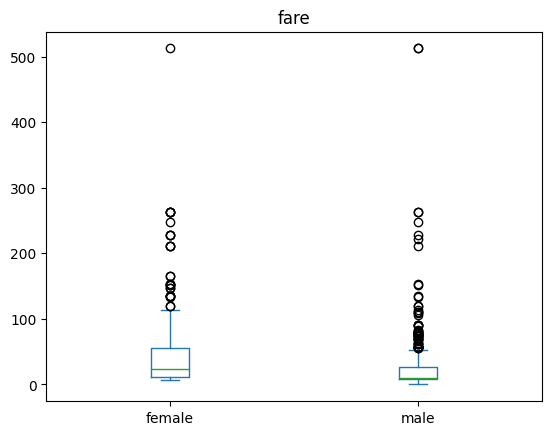

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
titanic.loc[:,['sex','fare']].plot.box(by=['sex'])

<Axes: xlabel='age', ylabel='fare'>

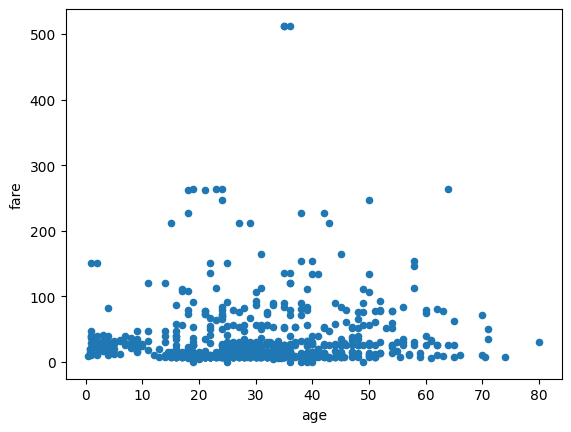

In [ ]:
titanic.loc[:,['fare','age']].plot.scatter(x='age',y='fare')

<Axes: ylabel='Density'>

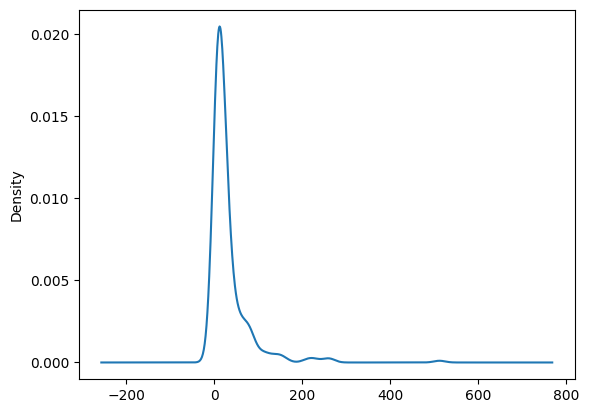

In [ ]:
titanic['fare'].plot.kde()

# Polars

Tutorial elaborado a partir de la [documentación oficial](https://docs.pola.rs/).

`Polars` es una librería que facilita la gestión de Dataframes, obteniendo un rendimiento mayor que `pandas`en la ejecución de operaciones.

Es ligero, en el sentido de que no requiere de gran cantidad de memoria para gestionar y realizar operaciones sobre los `dataframes`. Asimismo, de forma nativa, paraleliza (y en caso de estar en un clúster, distribuye) las operaciones en hilos / procesadores.

La sintaxis es similar a la de `pyspark dataframes` que, a su vez, es una adaptación de sql. Aquí veremos los aspectos más relevantes de esta librería.

In [ ]:
!pip install polars

In [ ]:
import polars as pl

## Creación de df

In [ ]:
%%time
pldf = pl.read_csv('/content/drive/MyDrive/datasets/iris.csv')

CPU times: user 1.25 ms, sys: 0 ns, total: 1.25 ms
Wall time: 7.17 ms


In [ ]:
pldf.schema

Schema([('sepal_length', Float64),
        ('sepal_width', Float64),
        ('petal_length', Float64),
        ('petal_width', Float64),
        ('species', String)])

In [ ]:
%%time
df = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')

CPU times: user 2.8 ms, sys: 1.1 ms, total: 3.9 ms
Wall time: 6.62 ms


### Selección y operación sobre columnas

`pl.col()`

In [ ]:
%%time
pldf.select(pl.col('species'),pl.col('sepal_width')).group_by('species').sum()

CPU times: user 2.15 ms, sys: 5 µs, total: 2.16 ms
Wall time: 3.63 ms


species,sepal_width
str,f64
"""setosa""",171.4
"""versicolor""",138.5
"""virginica""",148.7


In [ ]:
pldf.select(pl.col('sepal_length')+10)

sepal_length
f64
15.1
14.9
14.7
14.6
15.0
…
16.7
16.3
16.5


In [ ]:
out = pldf.select(pl.col("*"))
out.head()


sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""


In [ ]:
out.select(pl.col('sepal_length').alias('longitud'))

longitud
f64
5.1
4.9
4.7
4.6
5.0
…
6.7
6.3
6.5


In [ ]:
pldf.filter(pl.col('sepal_width')>1)

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""virginica"""
6.3,2.5,5.0,1.9,"""virginica"""
6.5,3.0,5.2,2.0,"""virginica"""


## Lazy API

Polars permite realizar una evaluación tardía en operaciones de lectura y transformación.

Es, en este sentido, similar a sintaxis y funcionamiento (a nivel conceptual) a lo que se usaréis con un `pyspark dataframe`. La evaluación tardía generará un grafo de operaciones a realizar que se ejecutarán cuando se llame a `collect`. Estas operaciones se realizarán de forma paralela o distribuida y, finalmente, se mezclarán en un sólo nodo

In [ ]:
pldfs = pl.scan_csv('/content/drive/MyDrive/datasets/iris.csv')

In [ ]:
pldfs.select(pl.col('species'),pl.col('sepal_width')).group_by('species').sum()

In [ ]:
%%time
pldfs.select(pl.col('species'),pl.col('sepal_width')).group_by('species').sum().collect()

CPU times: user 2.93 ms, sys: 139 µs, total: 3.07 ms
Wall time: 11.5 ms


species,sepal_width
str,f64
"""setosa""",171.4
"""versicolor""",138.5
"""virginica""",148.7


In [ ]:
pldfcond = pldfs.select(
    pl.col("sepal_length"),
    pl.when(pl.col("sepal_length") > 5)
    .then(pl.lit(True))
    .otherwise(pl.lit(False))
    .alias("big"),
)
#print(pldfcond)

In [ ]:
pldfcond.collect()

sepal_length,big
f64,bool
5.1,true
4.9,false
4.7,false
4.6,false
5.0,false
…,…
6.7,true
6.3,true
6.5,true
